In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('./CSVs/all_clean.csv')

In [3]:
df = df.sort_values(by='year', ascending=True).reset_index(drop=True)

In [4]:
df.columns

Index(['title', 'text', 'year', 'sentence_count'], dtype='object')

In [5]:
#I have to rename these columns because countvectorizer will make columns with these words too

df.columns = ['work_title', 'work_text', 'year_published', 'sentence_count']

In [6]:
df['word_count'] = df['work_text'].map(lambda x: len(x.split(' ')))

Text(0.5, 1.0, 'Word Count Over the Years')

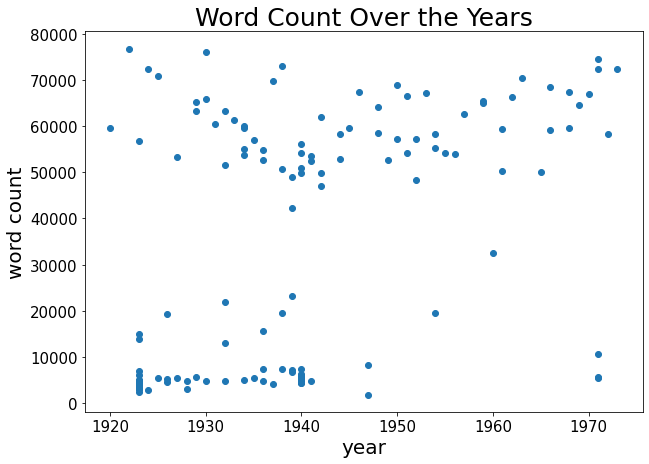

In [7]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_published'], df['word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('word count', size = 20)
plt.title('Word Count Over the Years', size = 25)

In [8]:
#I think I should remove her short stories, because I don't know if I have all of them
df = df[df['word_count'] > 45000].reset_index(drop=True)

Text(0.5, 1.0, 'Word Count Over the Years')

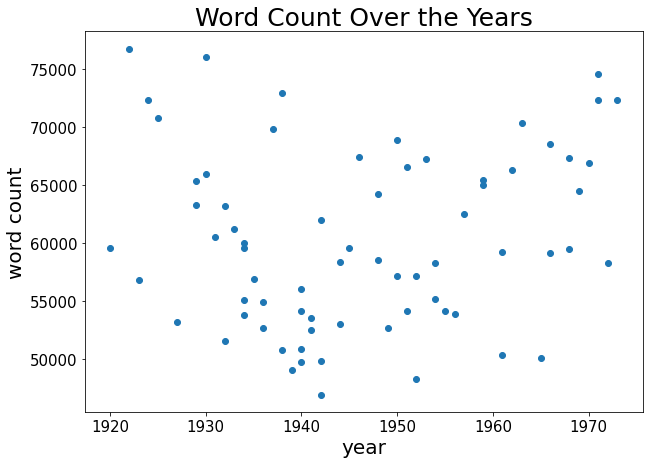

In [9]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_published'], df['word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('word count', size = 20)
plt.title('Word Count Over the Years', size = 25)

### Digging into the data

In [10]:
#no stop words because the authors of the paper look at some stop words
cv = CountVectorizer()
df2 = pd.DataFrame(cv.fit_transform(df['work_text']).todense(), columns=cv.get_feature_names())

In [11]:
text_and_counts = pd.concat([df, df2], axis=1)

### What's the number of unique words per piece of writing?

In [12]:
temp = text_and_counts.drop(['year_published', 'word_count','work_text'], axis=1)

In [13]:
words = []
for x in range(len(temp)):  
    w = {}
    w['work_title'] = temp.loc[x]['work_title']
    w['unique_word_count'] = sum(temp.iloc[x][1:] > 0)
    words.append(w)

In [14]:
word_df = pd.DataFrame(words)

In [15]:
word_df.head()

,work_title,unique_word_count
0,the mysterious affair at styles,8136
1,the secret adversary,10334
2,the murder on the links,7921
3,the man in the brown suit,9381
4,the secret of chimneys,9653


In [16]:
df = pd.merge(df, word_df)

In [17]:
df['unique_words_%'] = 100*(df['unique_word_count']/df['word_count'])

<AxesSubplot:>

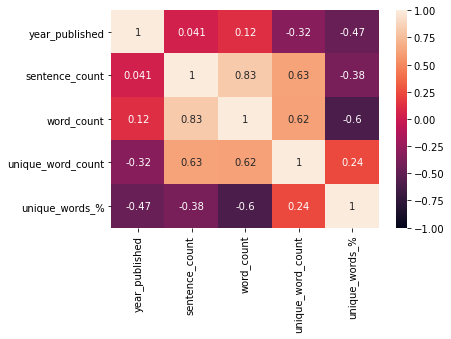

In [18]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Text(0.5, 1.0, 'Unique Words Over the Years')

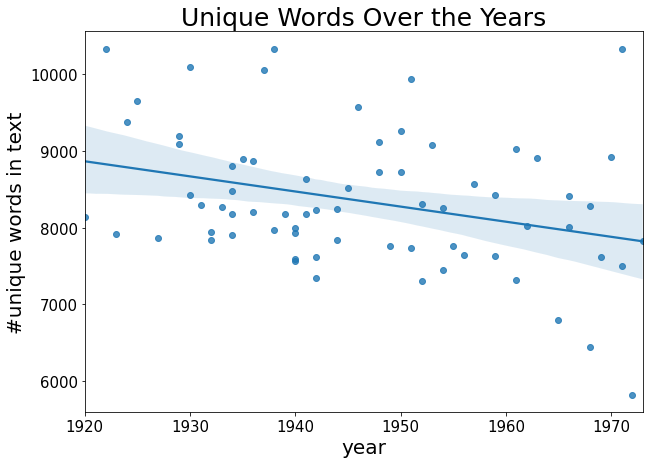

In [19]:
plt.figure(figsize=[10,7])
sns.regplot(x="year_published", y="unique_word_count", data=df);
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('#unique words in text', size = 20)
plt.title('Unique Words Over the Years', size = 25)

Text(0.5, 1.0, '% Unique Words Over the Years')

<Figure size 720x504 with 0 Axes>

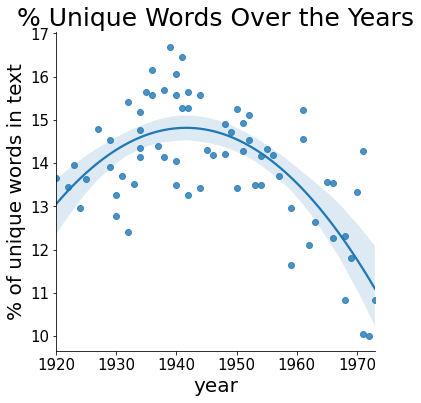

In [20]:
plt.figure(figsize=[10,7])
sns.lmplot(x="year_published", y="unique_words_%", data=df, order=2);
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('% of unique words in text', size = 20)
plt.title('% Unique Words Over the Years', size = 25)

### Looking at indefinite words:
In the paper:
>We counted the number of occurrences of the vague, indefinite words “thing”,
“anything”, and “something"

In [21]:
indefinite = text_and_counts[['year_published','something', 'thing', 'anything']].set_index('year_published')

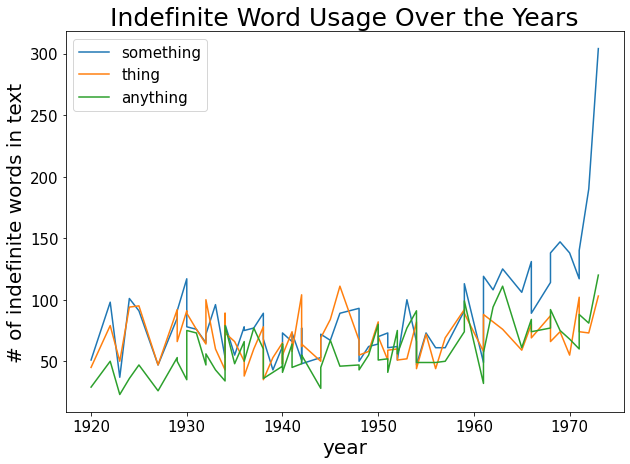

In [22]:
plt.figure(figsize=[10,7])
plt.plot(indefinite[['something', 'thing', 'anything']])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Indefinite Word Usage Over Time')
plt.xlabel('year', size = 20)
plt.ylabel('# of indefinite words in text', size = 20)
plt.title('Indefinite Word Usage Over the Years', size = 25)
plt.legend(('something', 'thing', 'anything'), loc="upper left", prop={'size': 15})

### Look at repeated bigrams over time

Text(0.5, 1.0, 'Repeated Bigrams Over the Years')

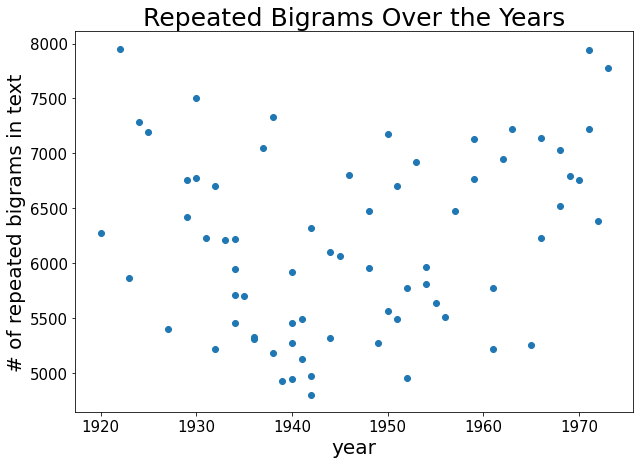

In [23]:
cv_2 = CountVectorizer(ngram_range=(2, 2))
bigrams = pd.DataFrame(cv_2.fit_transform(df['work_text']).todense(), columns=cv_2.get_feature_names())

text_and_bigrams = pd.concat([df, bigrams], axis=1)

temp2 = text_and_bigrams.drop(['year_published', 'word_count','work_text'], axis=1)

bi = []
for x in range(len(temp2)):  
    t = {}
    t['work_title'] = temp2.loc[x]['work_title']
    t['repeated_bigrams'] = sum(temp2.iloc[x][1:] > 1)
    bi.append(t)

text_and_bigrams = pd.merge(pd.DataFrame(bi), text_and_bigrams)

plt.figure(figsize=[10,7])
plt.scatter(text_and_bigrams['year_published'], text_and_bigrams['repeated_bigrams'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# of repeated bigrams in text', size = 20)
plt.title('Repeated Bigrams Over the Years', size = 25)

### Look at repeated trigrams over time

Text(0.5, 1.0, 'Repeated Trigrams Over the Years')

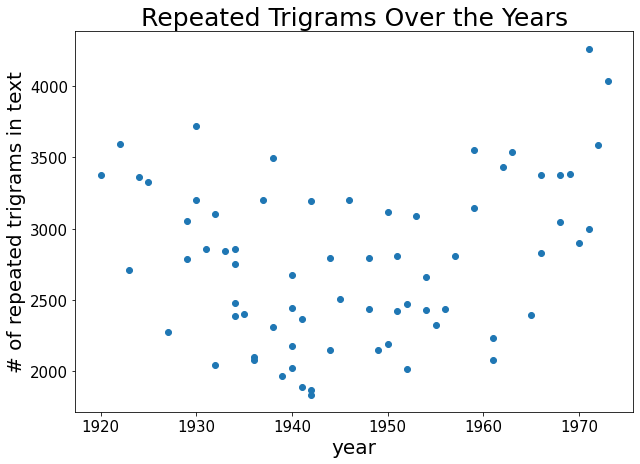

In [24]:
cv_3 = CountVectorizer(ngram_range=(3, 3))
trigrams = pd.DataFrame(cv_3.fit_transform(df['work_text']).todense(), columns=cv_3.get_feature_names())

text_and_trigrams = pd.concat([df, trigrams], axis=1)

temp3 = text_and_trigrams.drop(['year_published', 'word_count','work_text'], axis=1)

tri = []
for x in range(len(temp3)):  
    t = {}
    t['work_title'] = temp3.loc[x]['work_title']
    t['repeated_trigrams'] = sum(temp3.iloc[x][1:] > 1)
    tri.append(t)

text_and_trigrams = pd.merge(pd.DataFrame(tri), text_and_trigrams)

plt.figure(figsize=[10,7])
plt.scatter(text_and_trigrams['year_published'], text_and_trigrams['repeated_trigrams'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('# of repeated trigrams in text', size = 20)
plt.title('Repeated Trigrams Over the Years', size = 25)